# Visualization

Following the example code, we visualized the x-rays of three classes as below.


In [3]:
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: COVID-19_Rad

In [4]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-1911.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-764.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2869.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3146.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3128.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-476.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2741.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2130.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3329.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-489.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2629.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1049.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1808.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1831.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1899.png', 'COVID-19_Radiography_Dataset/COVID/images/CO

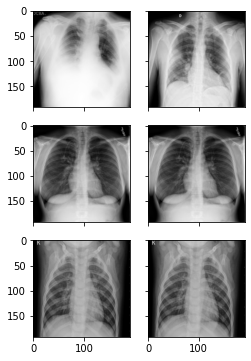

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])
im5 =preprocessor(fnames[2][1])
im6 =preprocessor(fnames[2][1])

fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4, im5, im6]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

From the above figure, we can tell the three different types of X-rays have distinct features (for example, the covid positive ones have white lungs), so that it is highly possible that they can be distinguished by a well-trained AI model.

# Discussion about practical usages

**Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.**

The dataset of COVID positive x-rays (and negative ones) is a collection of medical images of chest X-rays of patients that have been diagnosed with COVID-19 or have tested negative for the virus. This dataset can be used to build a predictive model that can help identify whether a patient has COVID-19 or not, based on the features observed in their chest X-rays.

Building a predictive model using this dataset can be practically useful for several reasons. Firstly, the COVID-19 pandemic has placed an enormous burden on healthcare systems worldwide, leading to a shortage of resources, including medical personnel, testing kits, and other medical supplies. Therefore, a model that can quickly and accurately identify COVID-19 cases from chest X-rays can help alleviate the burden on healthcare systems and allow them to prioritize treatment for those who need it most.

Secondly, the model can also be useful in areas where testing resources are scarce or not readily available. For instance, in rural or remote areas where access to medical facilities is limited, a chest X-ray might be the only diagnostic tool available. Therefore, a predictive model that can identify COVID-19 cases from chest X-rays can help healthcare workers quickly identify infected individuals, prevent the spread of the virus, and provide prompt treatment.

Lastly, a predictive model can also be used to monitor the progression of the disease in patients over time. By analyzing chest X-rays taken at different stages of the disease, the model can help identify patterns that can be used to predict disease progression and help healthcare workers develop better treatment plans.

Several groups of people could benefit from a model like this, including healthcare workers, policymakers, and researchers. Healthcare workers can use the model to quickly identify COVID-19 cases, prioritize treatment, and prevent the spread of the virus. Policymakers can use the model to make data-driven decisions about resource allocation and public health policies. Researchers can use the model to develop a better understanding of the disease and develop more effective treatments.

# Data preparation

In [2]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load preprocessed data
import pickle

prefix = '/content/drive/MyDrive/'
  
# Open the file in binary mode
# with open(prefix + 'X_train.pkl', 'rb') as file:
with open(prefix + 'X_train_augmented.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
# with open(prefix + 'y_train.pkl', 'rb') as file:
with open(prefix + 'y_train_augmented.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

In [6]:
# preprocessing function used to submit to leaderboard
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
  img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
  img = (np.float32(img)-1.)/(255-1.) # min max transformation
  img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
  return img

In [ ]:
X_train.shape, y_train.shape

((8223, 192, 192, 3), (8223, 3))

In [ ]:
!nvidia-smi

Mon Mar 13 13:32:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Below are the models that I built.

# Model 1: CNN

The first one is a 4-layer CNN. The model definition is shown below. I used `ModelCheckpoint` to save the model with largest validation accuracy (which is also used in other models), and trained 50 epochs to avoid underfitting.

As can be seen in the submission, this model was able to achieve an accuracy of **92.33%** on test
 set, ranked 16 on the leaderboard at the time when I wrote this report.

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  
  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  checkpoint_filepath = 'best_cnn_augmented.h5'
  # Define the ModelCheckpoint callback to save the best model
  checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)
  
  opt = Adam(0.001)
  model.compile(
    optimizer= opt, # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
 # Fitting the CNN to the Training set
  model.fit(X_train, y_train, epochs = 50, verbose=1,validation_split=.2, callbacks=[red_lr, checkpoint_callback])  # for callback that automatica
 

Epoch 1/50
206/206 [==============================] - 36s 112ms/step - loss: 0.7508 - accuracy: 0.6317 - val_loss: 0.6142 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 2/50
206/206 [==============================] - 20s 97ms/step - loss: 0.5777 - accuracy: 0.7393 - val_loss: 0.4974 - val_accuracy: 0.7684 - lr: 0.0010
Epoch 3/50
206/206 [==============================] - 20s 98ms/step - loss: 0.4644 - accuracy: 0.7954 - val_loss: 0.4295 - val_accuracy: 0.8085 - lr: 0.0010
Epoch 4/50
206/206 [==============================] - 20s 98ms/step - loss: 0.3761 - accuracy: 0.8370 - val_loss: 0.4501 - val_accuracy: 0.8103 - lr: 0.0010
Epoch 5/50
206/206 [==============================] - 20s 98ms/step - loss: 0.3207 - accuracy: 0.8632 - val_loss: 0.3585 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 6/50
206/206 [==============================] - 20s 97ms/step - loss: 0.2832 - accuracy: 0.8829 - val_loss: 0.3521 - val_accuracy: 0.8474 - lr: 0.0010
Epoch 7/50
206/206 [==============================] - 21s

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('best_cnn_augmented.h5',compile=False)
model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        4160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                    

In [ ]:
# Begin to submit models to image classification leaderboard
! pip install --upgrade aimodelshare 
# Restart session Runtime > Restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reload model and data
import tensorflow as tf
model = tf.keras.models.load_model('best_model.h5',compile=False)
model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 192, 192, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 192, 192, 32)      1056      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 96, 96, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 96, 96, 64)        4160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                  

In [ ]:
# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("cnn_augmented.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Save preprocessor function (may need to reload function in cell above)
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
#Use X_test data to generate model predictions and make leaderboard submission

#Generate and save predictions

#Load preprocessed data
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  
# Open the file in binary mode
with open('/content/drive/MyDrive/X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)

# Open the file in binary mode
with open('/content/drive/MyDrive/y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

with open('/content/drive/MyDrive/y_test.pkl', 'rb') as file:
    # Call load method to deserialze
    y_test = pickle.load(file)
    
prediction_column_index=model.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

41/41 [==============================] - 11s 46ms/step


In [ ]:
import numpy as np
labels = np.array(y_test).argmax(axis=1)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels, prediction_column_index)

In [ ]:
apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

import aimodelshare as ai
experiment= ai.Experiment(apiurl)

from aimodelshare.aws import set_credentials
set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): dropout-v
Provide any useful notes about your model (optional): nothing

Your model has been submitted as model version 255

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3340


In [ ]:
data = experiment.get_leaderboard()
experiment.stylize_leaderboard(data)

# Model 2: MobileNetV2 Transfer Learning

The second model made use of transfer learning. It is based on a MobileNetV2 trained on ImageNet, with the top layer removed, and three full-connected layer added to fine-tune on our own dataset. During training, we fix the pre-trained model weights and only train the added full-connected layers.

MobileNetV2 is a relatively lightweight pre-trained model that is suitable to run on mobile devices, so compared with other larger models, fine-tuning on MobileNet can be of highly practical values, because it makes the model more accessable.

This model showed fast convergence and was able to achieve **94.89%** on the test set, ranked 6th at the time when I wrote this report. The result is very promising and proved the effectiveness of MobileNetV2. To fine-tuning on other pre-trained models, we can do as simple as change the `MobileNetV2` to other model names, such as `resnet50`, `vgg16`, etc. We leave it to readers if they are interested in other models' performance.


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers in the base model so that we don't train them again
for layer in base_model.layers:
    layer.trainable = False

# Add a new top classification layer to the base model for our specific task
# In this example, we're doing 3-class classification (change the number of units to match your task)
x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x) # optional dropout layer for regularization
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

# Create the final model by combining the base model and the new top classification layer
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an optimizer, loss function, and metric(s)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = 'best_mobile_augmented1.h5'
# Define the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

from tensorflow.python.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=10,verbose=1,factor=0.1, min_lr=1e-8) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

# Train the model using your training data and validation data
# Fitting the CNN to the Training set
model.fit(X_train, y_train, epochs = 50, verbose=1,validation_split=.2, callbacks=[checkpoint_callback])

Epoch 1/50
206/206 [==============================] - 27s 64ms/step - loss: 0.4655 - accuracy: 0.8615 - val_loss: 0.2580 - val_accuracy: 0.9125
Epoch 2/50
206/206 [==============================] - 10s 49ms/step - loss: 0.1021 - accuracy: 0.9628 - val_loss: 0.2045 - val_accuracy: 0.9416
Epoch 3/50
206/206 [==============================] - 11s 51ms/step - loss: 0.0326 - accuracy: 0.9872 - val_loss: 0.1678 - val_accuracy: 0.9489
Epoch 4/50
206/206 [==============================] - 10s 50ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.1245 - val_accuracy: 0.9635
Epoch 5/50
206/206 [==============================] - 11s 53ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9684
Epoch 6/50
206/206 [==============================] - 9s 44ms/step - loss: 6.2935e-04 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9666
Epoch 7/50
206/206 [==============================] - 9s 43ms/step - loss: 4.2459e-04 - accuracy: 1.0000 - val_loss: 0.1173 - val_acc

KeyboardInterrupt: ignored

In [ ]:
# Reload model and data
import tensorflow as tf
model = tf.keras.models.load_model('best_mobile_augmented.h5',compile=False)
model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model-mobilenet_augmented.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Use X_test data to generate model predictions and make leaderboard submission

#Generate and save predictions

#Load preprocessed data
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  
# Open the file in binary mode
with open('/content/drive/MyDrive/X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)

# Open the file in binary mode
with open('/content/drive/MyDrive/y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)
    
with open('/content/drive/MyDrive/y_test.pkl', 'rb') as file:
    # Call load method to deserialze
    y_test = pickle.load(file)
    
prediction_column_index=model.predict(X_test).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

41/41 [==============================] - 12s 44ms/step


In [ ]:
import numpy as np
labels = np.array(y_test).argmax(axis=1)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels, prediction_column_index)

In [ ]:
apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

import aimodelshare as ai
experiment= ai.Experiment(apiurl)

from aimodelshare.aws import set_credentials
set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): mobilenet-v2
Provide any useful notes about your model (optional): none

Your model has been submitted as model version 256

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3340


In [ ]:
data = experiment.get_leaderboard()
experiment.stylize_leaderboard(data)

# Model 3: MLP

The third model is a very simple 5-layer MLP. As the CNN models achieved 100% accuracy on the training set easily, we use this simple model to prove this dataset is not that "trivial" —— THis MLP model only achieved 93% on training set and 85% on validation set.

I ended up not submitting this model. **Note: There is another highly-accurate model below.**


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint


with tf.device('/device:GPU:0'):
  # Define the MLP model architecture
  model = Sequential([
      Flatten(input_shape=(192, 192, 3)),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(3, activation='softmax')
  ])

  # Compile the model with appropriate loss function, optimizer, and metrics
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  checkpoint_filepath = 'best_mlp.h5'
  # Define the ModelCheckpoint callback to save the best model
  checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)

  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.1, min_lr=1e-8) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  # Train the model using your training data and validation data
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, epochs = 50, verbose=1,validation_split=.2, callbacks=[red_lr, checkpoint_callback])


Epoch 1/50
69/69 [==============================] - 4s 57ms/step - loss: 4.4686 - accuracy: 0.5630 - val_loss: 2.0792 - val_accuracy: 0.6084 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - 1s 22ms/step - loss: 1.3241 - accuracy: 0.6811 - val_loss: 1.5674 - val_accuracy: 0.5446 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - 3s 41ms/step - loss: 0.8419 - accuracy: 0.7249 - val_loss: 0.8042 - val_accuracy: 0.7432 - lr: 0.0010
Epoch 4/50
69/69 [==============================] - 1s 21ms/step - loss: 0.6374 - accuracy: 0.7578 - val_loss: 0.6898 - val_accuracy: 0.7158 - lr: 0.0010
Epoch 5/50
69/69 [==============================] - 1s 20ms/step - loss: 0.9024 - accuracy: 0.7117 - val_loss: 2.3115 - val_accuracy: 0.4663 - lr: 0.0010
Epoch 6/50
69/69 [==============================] - 1s 18ms/step - loss: 0.7381 - accuracy: 0.7121 - val_loss: 0.7104 - val_accuracy: 0.7413 - lr: 0.0010
Epoch 7/50
69/69 [==============================] - 3s 37ms/step - loss: 0.5

# Model 4: Ensembling

This is the third model I submitted to leaderboard. This model is a very simple ensemble of two existing models, one is the 4-layer CNN model we trained, another is the fine-tuned MobileNetV2. I performed a simple average to the predicted values and used that average value to predict. This turned out to achieve **96.05%** on the leaderboard, ranked 3rd at the time when I wrote this report.

In [ ]:
import tensorflow as tf
# Load the two trained models
model1 = tf.keras.models.load_model('best_model-v1.h5', compile=False)
model2 = tf.keras.models.load_model('best_mobilenet.h5', compile=False)

In [ ]:

model1.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model2.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
import pickle
  
# Open the file in binary mode
with open('/content/drive/MyDrive/X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)

# Open the file in binary mode
with open('/content/drive/MyDrive/y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

In [ ]:
import numpy as np

pred_1 = model1.predict(X_test)
pred_2 = model2.predict(X_test)
# Combine the predictions using averaging
ensemble_preds = np.mean([pred_1, pred_2], axis=0)

prediction_column_index = ensemble_preds.argmax(axis=1)


# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

In [ ]:
prediction_column_index = ensemble_preds.argmax(axis=1)


# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

In [ ]:
y_test

COVID  NORMAL  PNEUMONIA
3695      0       0          1
554       1       0          0
1627      0       1          0
1373      0       1          0
1079      1       0          0
...     ...     ...        ...
2607      0       1          0
708       1       0          0
952       1       0          0
542       1       0          0
3289      0       0          1

[1291 rows x 3 columns]

In [ ]:
labels = np.array(y_test).argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels, prediction_column_index)

In [ ]:
accuracy

0.9604957397366383

In [ ]:
apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

import aimodelshare as ai
experiment= ai.Experiment(apiurl)

from aimodelshare.aws import set_credentials
set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = None,
                                 preprocessor_filepath=None,
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): ensemble-model
Provide any useful notes about your model (optional): average

Your model has been submitted as model version 257

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3340


In [ ]:
data = experiment.get_leaderboard()
experiment.stylize_leaderboard(data)

# Result Discussion

The above results gave us the following insights:
* Compared to MLPs, CNNs are better in capturing image features.
* Fine-tuning on exisiting models can lead to faster convergence and better results, with the minimum cost to design model architecture (usually just adding a few fully-connected layers on the top).
* Ensembling can combine the advantages on different models and yields a better result.

# Data Augmentation

We perform data augmentation with the help of the `ImageDataGenerator` provided by Tensorflow. The transformations include rotation, shifting, zooming and flipping.

With the help of data augmentation, we got a new dataset which has a 3x size compared to the original.

I trained the first two models I submitted on the augmented dataset. It turns out to achieve a better training and validation accuracy (~97% validation acc), however, to my surprise, they performed worse on the test set: the simple CNN model got ~91%, while the fine-tuned MobileNetV2 got ~93%.

After some discussion and analysis, I think the reason for it is the data distribution of test data. Our dataset is rather simple, where training data and testing data have a highly similar pattern. While data augmentation avoids the model from overfitting, enabling the model to be robust on different images, the test data does not have the features that the transformed data has. Thus, the model performs worse on the test data in this case. But, I believe, in real scenarios where we would have images of different quality, data augmentation could definitely help in achieving higher accuracy.

In [ ]:
X_train.shape, y_train.shape

((2741, 192, 192, 3), (2741, 3))

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented data for each original image
augmented_images, augmented_labels = [], []
num_augmentations = 2  # Generate 5 augmented images per original image
for i in range(num_augmentations):
  # Create a generator for the augmented images and labels
  augmented_data = datagen.flow(
      x=X_train,
      y=y_train,
      batch_size=len(X_train),
      shuffle=True,
      seed=42,
  )
  batch = augmented_data.next()
  augmented_images.append(batch[0])
  augmented_labels.append(batch[1])

In [ ]:
# Concatenate the augmented data batches into arrays
X_train1 = np.concatenate(augmented_images, axis=0)
y_train1 = np.concatenate(augmented_labels, axis=0)

In [ ]:
X_train1.shape, y_train1.shape

((5482, 192, 192, 3), (5482, 3))

In [ ]:
X_train = np.concatenate((X_train, X_train1), axis=0)
y_train = np.concatenate((y_train, y_train1), axis=0)

In [ ]:
del(X_train1)
del(y_train1)

In [ ]:
X_train.shape, y_train.shape

((8223, 192, 192, 3), (8223, 3))

In [ ]:
import numpy as np

# shuffle the indices of the dataset
shuffled_indices = np.random.permutation(len(X_train))

# use the shuffled indices to shuffle X_train and y_train together
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [ ]:
import pickle

# Open a file and use dump()
with open('X_train_augmented.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

import pickle

# Open a file and use dump()
with open('y_train_augmented.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)